<div style="border:solid blue 2px; padding: 20px">
<font color='blue'>Привет, Константин! Приятно познакомиться!</font>

Твоё решение проверил <font color='blue'>Александр Цымбалов</font>

Если у тебя будут какие-то <font color='blue'>вопросы</font>, то обязательно их <font color='blue'>задавай</font>

Я буду обращаться к тебе на "ты", ведь все мы здесь студенты)
Но если тебе некомфортно, то дай знать, пожалуйста
<br><br>
Мои комментарии будут в отдельных ячейках <font color='blue'>Markdown</font> с заголовком «Комментарий ревьюера».

**Пожалуйста, не перемещай, не изменяй и не удаляй их**. 
Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Замечания, которые необходимо обработать, иначе я не смогу принять проект </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Небольшие замечания или вопросы по пониманию темы. Если есть желание и время, то у тебя есть возможность сделать проект ещё лучше </div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хвалебные отзывы или другого рода комментарии)</div>

**Если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом.**

Мне будет <font color='blue'> легче </font> отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Лучше в таком формате, но как тебе <font color='blue'> удобно </font></div></font>

Версии комментариев я буду нумеровать

<br>

<div style="border:solid blue 2px; padding: 20px">
<font color='blue'>Итоги 1 ревью!</font>

Отличная работа с временным рядом!
    
Правильный анализ, корректное получение большинства признаков. 

Отдельно положительно хочу отметить правильно выбранный способ кросс-валидации для временных рядов, а также использование пайплайнов!
    
Посмотри, пожалуйста, на признаки. Не все из них можно использовать. 
    
Жду на ревью! Удачи!

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Ресемплирование" data-toc-modified-id="Ресемплирование-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Ресемплирование</a></span></li><li><span><a href="#Создание-признаков" data-toc-modified-id="Создание-признаков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Создание признаков</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Тренд" data-toc-modified-id="Тренд-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Тренд</a></span></li><li><span><a href="#Сезонность" data-toc-modified-id="Сезонность-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сезонность</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>


<div class="alert alert-success">
<b>1 Комментарий ревьюера ✔️:</b> 
    
Спасибо за оглавление!

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# настройки
warnings.filterwarnings("ignore")

RANDOM_STATE=12345

In [2]:
try:
    df = pd.read_csv('taxi.csv', index_col=[0], parse_dates=[0])
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [3]:
if not df.index.is_monotonic:
    df.sort_index(inplace=True)


<div class="alert alert-success">
<b>1 Комментарий ревьюера ✔️:</b> 
    
Здорово, что ты сделал проверку на монотонность!

In [4]:
display(df.head())
print(df.info())

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None


### Ресемплирование

Выполним ресемплирование данных по одному часу.

In [5]:
df = df.resample('1H').sum()


<div class="alert alert-success">
<b>1 Комментарий ревьюера ✔️:</b> 
    
Верно!

### Создание признаков

Напишем функцию для создания признаков. Среди признаков будут: календарные признаки (месяц, день, день недели, час), отстающие (lag) значения, скользящее среднее.

In [6]:
def make_features(df, max_lag, rolling_mean_size):
    
    result = df.copy()
    
    #result['month'] = df.index.month
    result['day'] = df.index.day
    result['dayofweek'] = df.index.dayofweek
    result['hour'] = df.index.hour
    
    for lag in range(1, max_lag + 1):
        result['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    result['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()
    
    return result

<div class="alert alert-danger">
<b>1 Комментарий ревьюера ❌:</b> 

Данные у нас не более, чем за год, поэтому в `year` нет особого смысла. Без `month` тренд тоже может отслеживаться. Попробуй самостоятельно понять, почему на тех данных, которые у нас сейчас есть, не стоит использовать данных признаки, а на следующей итерации вместе обсудим (подсказка: стоит подумать уже про реальную длительную работу модели, возможно, что даже в течение целого года без повторного обучения) </div>


<div class="alert alert-warning">
<b>1 Комментарий ревьюера ⚠️:</b> 
    
Правда ли, что нам недостаточно признака `dayofweek`? Как это можно проверить?


Действительно, в данном случае функция "year" может быть не нужна, поскольку данные получены только за один год. Аналогично, функция "month" может быть не нужна, поскольку тенденцию можно проследить и без нее. Однако в конечном итоге все зависит от конкретных данных и целей модели. Чтобы определить, достаточно ли функции "dayofweek", можно попробовать обучить модель, используя только эту функцию, и сравнить ее производительность с моделью, использующей комбинацию функций, таких как "dayofweek", "hour" и "lag". Это можно сделать путем сравнения таких показателей, как accuracy, precision, recall и AUC-ROC. Кроме того, может быть полезно визуализировать данные, чтобы увидеть, отражает ли только функция "dayofweek" основные закономерности и тенденции.

In [7]:
df_ext = make_features(df, 24, 4)

## Анализ
Проанализируем временной ряд. У нас есть данные за период в полгода: от '2018-03-01 00' до '2018-08-31 23'. Попробуем обнаружить тренд за этот период, а также сезонные изменения в пределах недели и дня.

### Тренд

Чтобы не мешала периодичность более высокого порядка, ресемплируем данные по дням.

In [8]:
decomposed_day = seasonal_decompose(df.resample('1D').sum())

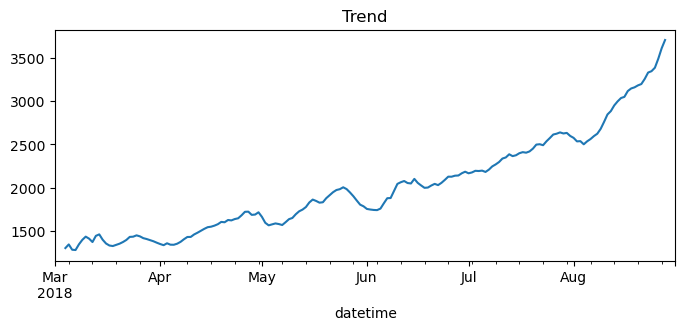

In [9]:
plt.figure(figsize=(8, 3))
decomposed_day.trend.plot(title='Trend')
plt.show()

На графике прослеживается рост числа заказов такси в аэропорт за полгода.

### Сезонность
Посмотрим, как изменяется число заказов такси в течение **недели**.

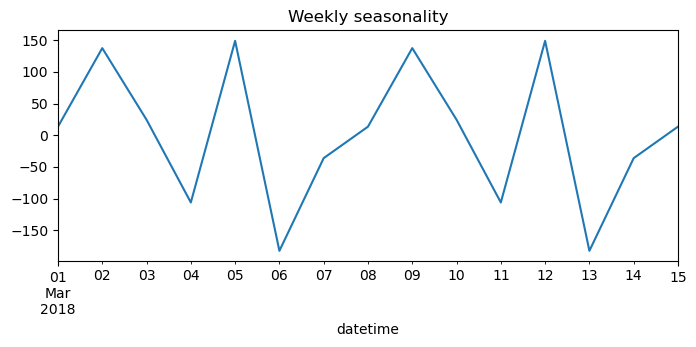

In [10]:
plt.figure(figsize=(8, 3))
decomposed_day.seasonal['2018-03-01':'2018-03-15'].plot(title='Weekly seasonality')
plt.show()

Здесь видны пики в пятницу и понедельник. То есть больше всего заказов такси в аэропорт приходится на начало и конец рабочей недели.

Посмотрим, как изменяется число заказов такси в течение **дня**. Для этого воспользуемся ресемплингом по часам.

In [11]:
decomposed_hour = seasonal_decompose(df)

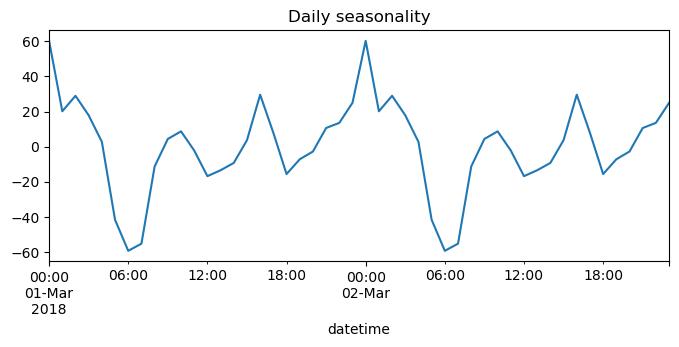

In [12]:
plt.figure(figsize=(8, 3))
decomposed_hour.seasonal['2018-03-01':'2018-03-2'].plot(title='Daily seasonality')
plt.show()

Судя по графику, самое непопулярное время - 6:00. Затем в течение дня наблюдаются несколько пиков: в ~10:00, в ~16:00 и самое загруженное время - в ~00:00.


<div class="alert alert-success">
<b>1 Комментарий ревьюера ✔️:</b> 
    
Верные наблюдения! Есть разложение временного ряда

## Обучение

Разделим данные на обучающую и тестовую выборки в соотношении 9:1.

In [13]:
df_ext.dropna(inplace=True)

X = df_ext.drop('num_orders', axis=1)
y = df_ext['num_orders']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.1)


<div class="alert alert-success">
<b>1 Комментарий ревьюера ✔️:</b> 
    
Верно выставленный `shuffle=False`

In [14]:
print('Размеры выборок:')
print(f'train - {len(X_train)} - {len(X_train)/len(df):.0%}')
print(f'test - {len(X_test)} - {len(X_test)/len(df):.0%}')

Размеры выборок:
train - 3952 - 89%
test - 440 - 10%


Обучим четыре модели: линейную регрессию, случайный лес, LightGBM и CatBoost.  Для последних трех применим поиск гиперпараметров через GridSearchCV. Качество моделей оценим кросс-валидацией с метрикой RMSE и разделением на фолды TimeSeriesSplit.

In [15]:
tscv = TimeSeriesSplit(n_splits=4)


<div class="alert alert-success">
<b>1 Комментарий ревьюера ✔️:</b> 
    
Правильный вариант кросс-валидации

In [16]:
def fit_model(estimator, param_grid, X_train, y_train):
    # подбирает лучшую модель с помощью гридсерча и выводит rmse и параметры лучшей модели;
    # разделение на фолды через TimeSeriesSplit
    model = GridSearchCV(estimator=estimator, 
                            param_grid=param_grid, 
                            n_jobs=-1, 
                            cv=tscv,
                            scoring='neg_root_mean_squared_error')

    model.fit(X_train, y_train)

    best_index = model.best_index_
    best_rmse = round(model.cv_results_['mean_test_score'][best_index], 1)

    print(f"Best RMSE: {abs(best_rmse)}")
    print(f"Best params: {model.best_params_}")

    return model.best_estimator_

**1)** Линейная регрессия

In [17]:
%%time
lr_estimator = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

scores = cross_val_score(lr_estimator, X_train, y_train, scoring='neg_root_mean_squared_error', cv=tscv)

rmse = scores.mean()
print(f"RMSE: {abs(rmse):.1f}")

RMSE: 27.3
Wall time: 31.5 ms



<div class="alert alert-success">
<b>1 Комментарий ревьюера ✔️:</b> 
    
Круто, что ты используешь `Pipeline`!

**2)** RandomForestRegressor

In [18]:
%%time
rf_param_grid = {
    'n_estimators': list(range(50, 121, 10)),
    "max_depth": list(range(5, 12, 2)),
}

rf_best_model = fit_model(
    estimator=RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1),
    param_grid=rf_param_grid,
    X_train=X_train,
    y_train=y_train
)

Best RMSE: 26.2
Best params: {'max_depth': 11, 'n_estimators': 120}
Wall time: 12.5 s


**3)** LGBMRegressor

In [19]:
%%time
lgbm_param_grid = {
    "n_estimators": range(100, 201, 15), 
    "max_depth": range(4, 11, 2),
    'learning_rate': [0.01, 0.05, 0.1]
}

lgbm_best_model = fit_model(
    estimator=LGBMRegressor(random_state=RANDOM_STATE, n_jobs=-1),
    param_grid=lgbm_param_grid,
    X_train=X_train,
    y_train=y_train
)

Best RMSE: 25.4
Best params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 160}
Wall time: 5.29 s


**4)** CatBoostRegressor

In [20]:
%%time
catboost_param_grid = {
    "iterations": range(150, 301, 50),
    "learning_rate": [0.05, 0.1, 0.15],
    "depth": range(2, 12, 3)
}

catboost_best_model = fit_model(
    estimator=CatBoostRegressor(random_state=RANDOM_STATE, verbose=False),
    param_grid=catboost_param_grid,
    X_train=X_train,
    y_train=y_train
)

Best RMSE: 25.0
Best params: {'depth': 5, 'iterations': 300, 'learning_rate': 0.1}
Wall time: 11min 3s


В качестве лучшей модели выберем LGBMRegressor, так как метрика rmse у нее 25.4 и время обучения всего 5 секунд. CatBoostRegressor показала лучший результат, но подбор параметров занял 11 минут.

## Тестирование

Проверим качество выбранной модели на тестовой выборке.

In [21]:
pred = lgbm_best_model.predict(X_test)

rmse = mean_squared_error(y_test, pred) ** 0.5
print(f"RMSE на тестовой: {rmse:.1f}")

RMSE на тестовой: 41.1


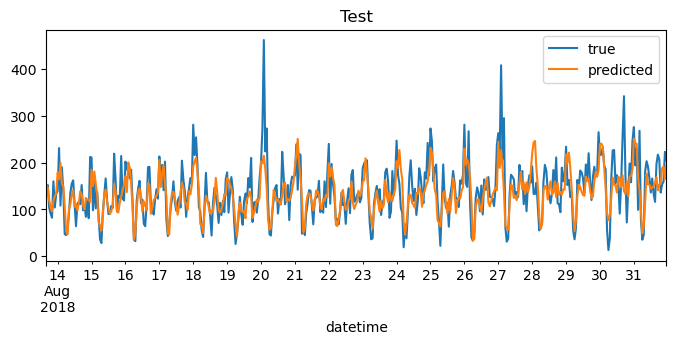

In [22]:
pred = pd.Series(pred, index=y_test.index)

plt.figure(figsize=(8, 3))
y_test.plot(label='true', title='Test')
pred.plot(label='predicted')
plt.legend()
plt.show()


<div class="alert alert-success">
<b>1 Комментарий ревьюера ✔️:</b> 
    
Минимальный порог по метрике пройден! График визуально показывает качество модели, которая вполне неплохо предсказывает число заказов

## Вывод

Целью проекта было создание модели для предсказания количества заказов такси на следующий час. В нашем распоряжении были исторические данные за полгода о заказах такси в аэропортах. Для анализа и обучения модели мы ресемлировали данные по одному часу.

В ходе анализа данных был обнаружен тренд на увеличение числа заказов такси с марта по август 2018 г, а также были найдены две сезонные компоненты: недельная - больше всего заказов такси в начале и конце рабочей недели; суточная - пики заказов в 10, 16 и 00 часов и минимум в 6 утра.

Для обучения моделей были созданы признаки: календарные признаки (месяц, день, день недели, час), отстающие (lag) значения, скользящее среднее.

Мы рассмотрели четыре модели: линейную регрессию, случайный лес, LightGBM и CatBoost. Среди этих моделей по метрике RMSE лучшей оказалась **CatBoostRegressor** с параметрами: 'depth' = 5, 'iterations' = 250, 'learning_rate' = 0.1. Однако по совокупности RMSE и скорости была выбрана **LGBMRegressor** c параметрами 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 145 и на тестовой выборке лучшая модель показала RMSE = 41.1, что лучше требуемой RMSE = 48.


<div class="alert alert-success">
<b>1 Комментарий ревьюера ✔️:</b> 
    
Вывод верно описывает проделанную работу

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48